Using TensorFlow backend.


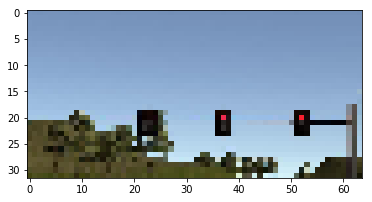

In [1]:
import glob
import re
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

%matplotlib inline

light_regex = 'sim_(?P<color>[a-z]+)_[0-9]+.jpg'
X_train = []
y_train = []
for light in glob.glob('train/*.jpg'):
    im = cv2.imread(light)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = cv2.resize(im, (64,32))
    match = re.search(light_regex, light)
    
    X_train.append(im)
    if match.group('color') == 'green':
        y_train.append(0)
    elif match.group('color') == 'yellow':
        y_train.append(1)
    elif match.group('color') == 'red':
        y_train.append(2)
    
y_train = to_categorical(y_train)

X_train = np.array(X_train)
plt.imshow(X_train[0])

In [34]:
input_shape = (32, 64, 3)
num_classes = 3
rate = 0.001
EPOCHS = 50
BATCH_SIZE = 64
keep_prob = 0.2

In [35]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras import losses, optimizers, regularizers

model = Sequential([
    Conv2D(8, 5, padding='same', input_shape=input_shape, activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(16, 5, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Conv2D(32, 5, padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Flatten(),
    Dense(240, activation='relu'),
    Dropout(keep_prob),
    Dense(168, activation='relu'),
    Dropout(keep_prob),
    Dense(num_classes, activation='softmax'),
])

loss = losses.categorical_crossentropy
optimizer = optimizers.SGD(lr=rate)

In [37]:
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=True, validation_split=0.1, shuffle=True)
score = model.evaluate(X_train, y_train, verbose=0)
print(score)

Train on 315 samples, validate on 36 samples
Epoch 1/50
315/315 [==============================] - 2s 5ms/step - loss: 0.1978 - acc: 0.9270 - val_loss: 0.3336 - val_acc: 0.8611
Epoch 2/50
315/315 [==============================] - 0s 1ms/step - loss: 0.1874 - acc: 0.9079 - val_loss: 0.2995 - val_acc: 0.8611
Epoch 3/50
315/315 [==============================] - 0s 1ms/step - loss: 0.2457 - acc: 0.8984 - val_loss: 0.2668 - val_acc: 0.8889
Epoch 4/50
315/315 [==============================] - 0s 1ms/step - loss: 0.2315 - acc: 0.9206 - val_loss: 0.3071 - val_acc: 0.8333
Epoch 5/50
315/315 [==============================] - 0s 1ms/step - loss: 0.1716 - acc: 0.9238 - val_loss: 0.2495 - val_acc: 0.8611
Epoch 6/50
315/315 [==============================] - 0s 1ms/step - loss: 0.1856 - acc: 0.9270 - val_loss: 0.2872 - val_acc: 0.8611
Epoch 7/50
315/315 [==============================] - 0s 1ms/step - loss: 0.1802 - acc: 0.9365 - val_loss: 0.3286 - val_acc: 0.8333
Epoch 8/50
315/315 [===========

In [38]:
model.save('tl_lenet.h5')